<a href="https://colab.research.google.com/github/safi-alt/CE888/blob/Lab-5/exploration_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#How many samples and features are there?
data = load_wine(as_frame=True)
data.frame
# YOUR CODE HERE
print('number of samples:', len(data.frame), 'number of features:', len(data.feature_names))

number of samples: 178 number of features: 13


In [4]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE


print("No. of instances for class 0:",len(df.query('y == 0')))
print("No. of instances for class 1:",len(df.query('y == 1')))
print("No. of instances for class 2:",len(df.query('y == 2')))


No. of instances for class 0: 59
No. of instances for class 1: 71
No. of instances for class 2: 48


In [5]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
print("Stats for all features are: \n")
for feature in data.feature_names:
  print(feature, ":  Mean=", np.mean(df[feature]), " Median=", np.median(df[feature]), " Std Deviation=", np.std(df[feature]))

Stats for all features are: 

alcohol :  Mean= 13.000617977528083  Median= 13.05  Std Deviation= 0.809542914528517
malic_acid :  Mean= 2.336348314606741  Median= 1.8650000000000002  Std Deviation= 1.1140036269797895
ash :  Mean= 2.3665168539325854  Median= 2.36  Std Deviation= 0.2735722944264325
alcalinity_of_ash :  Mean= 19.49494382022472  Median= 19.5  Std Deviation= 3.330169757658213
magnesium :  Mean= 99.74157303370787  Median= 98.0  Std Deviation= 14.242307673359807
total_phenols :  Mean= 2.295112359550562  Median= 2.355  Std Deviation= 0.6240905641965366
flavanoids :  Mean= 2.0292696629213474  Median= 2.135  Std Deviation= 0.9960489503792328
nonflavanoid_phenols :  Mean= 0.36185393258426973  Median= 0.34  Std Deviation= 0.12410325988364797
proanthocyanins :  Mean= 1.5908988764044953  Median= 1.5550000000000002  Std Deviation= 0.5707488486199377
color_intensity :  Mean= 5.058089882022473  Median= 4.6899999999999995  Std Deviation= 2.3117646609525573
hue :  Mean= 0.9574494382022468

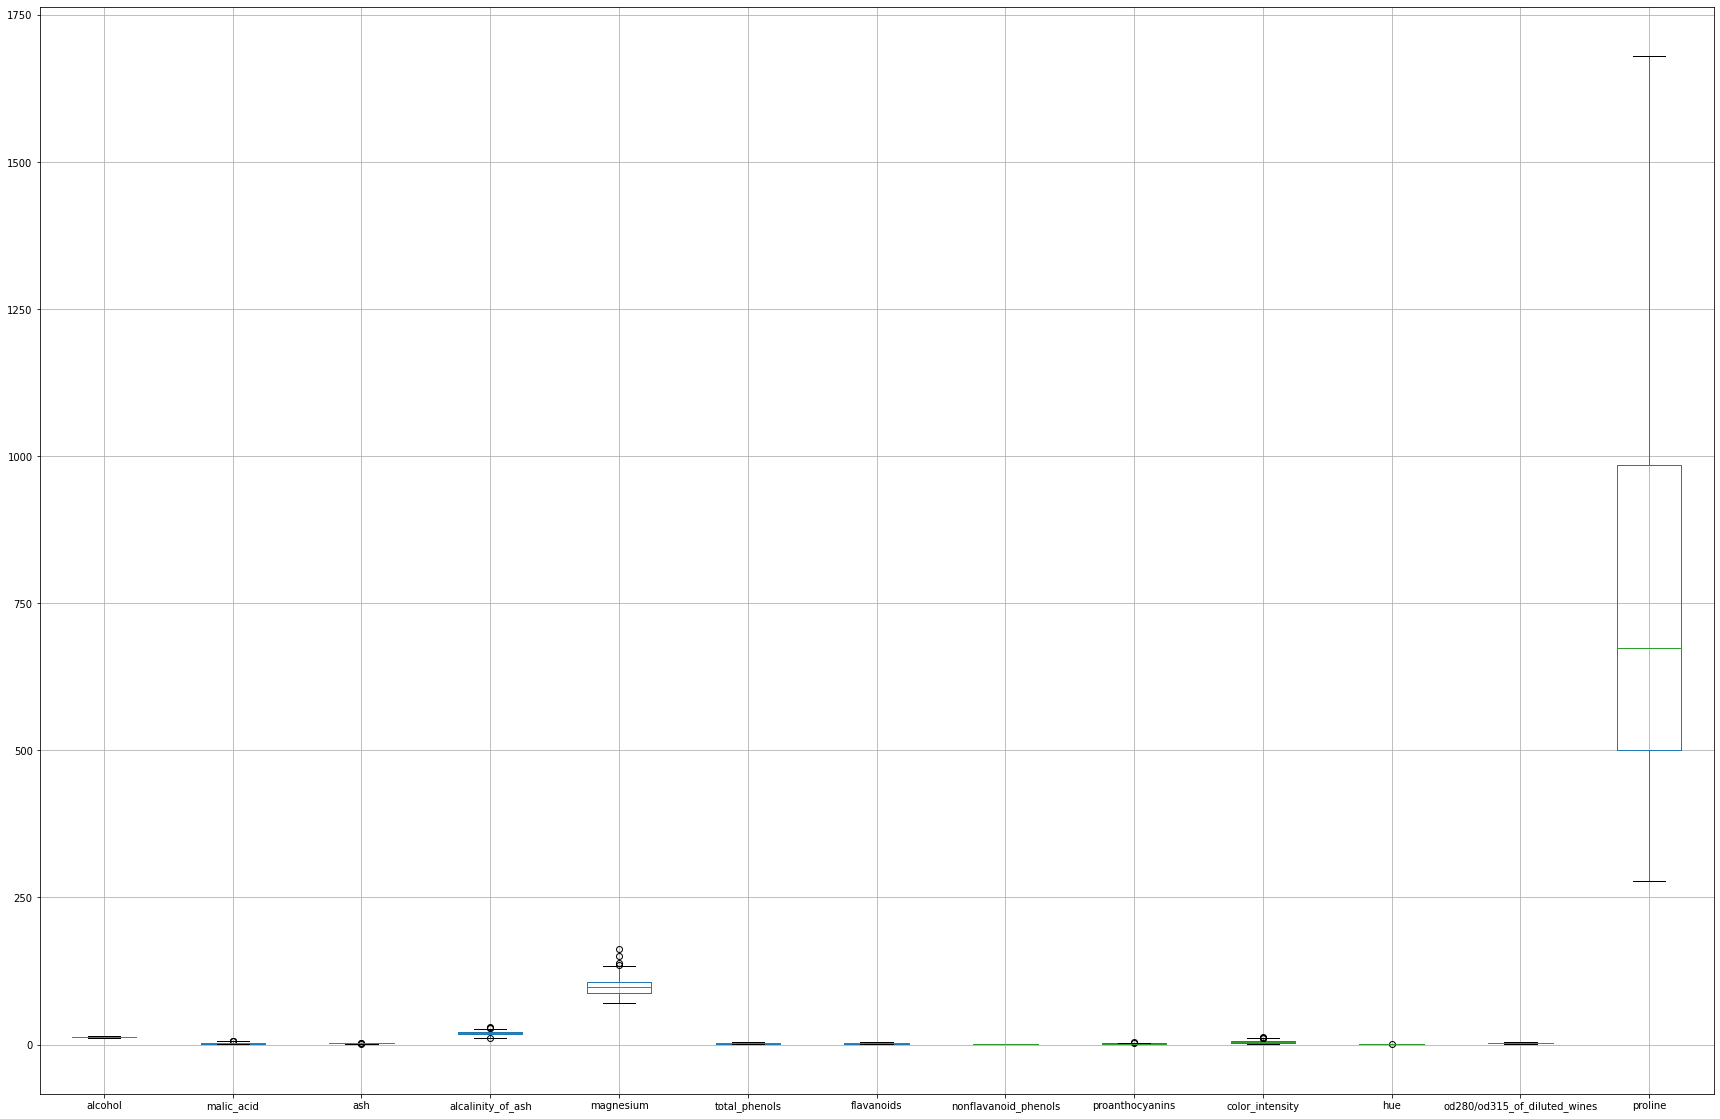

In [6]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE

df.boxplot(column=data.feature_names, figsize=(30,20))

In [7]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb9f9598d0>,
      dtype=object)

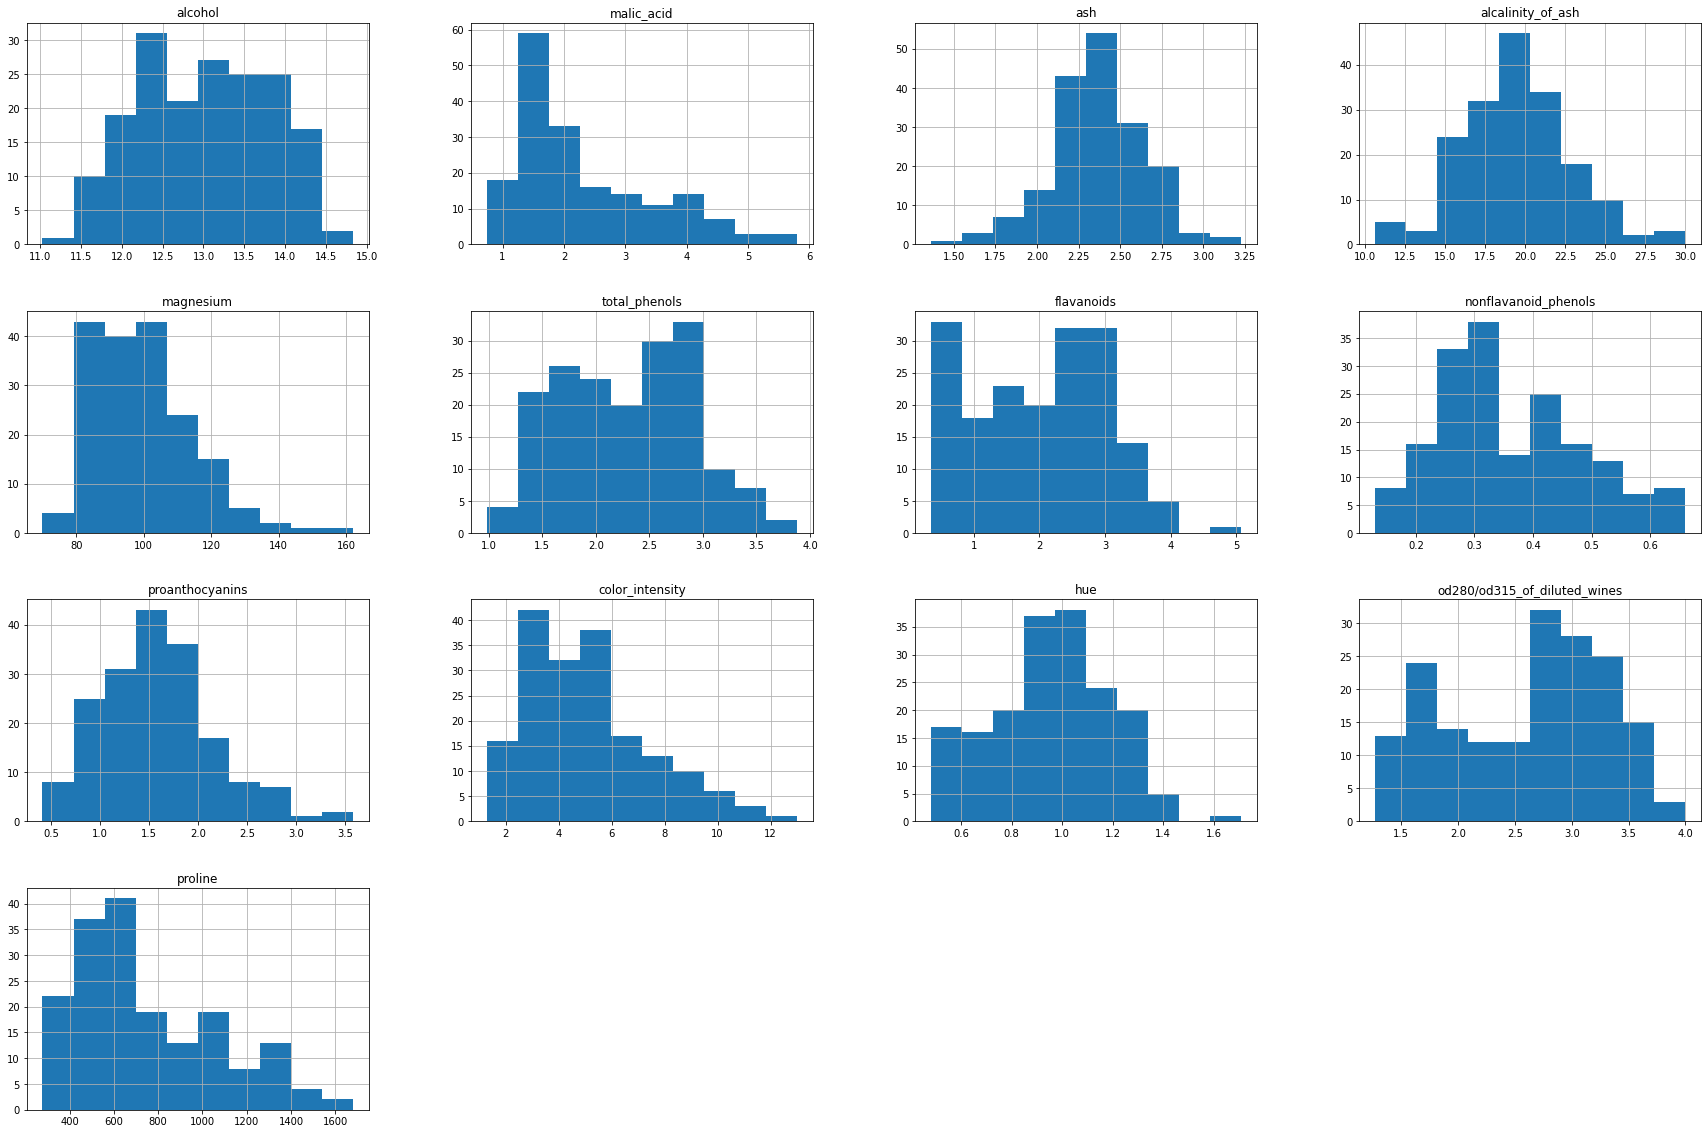

In [8]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
df.hist(column=data.feature_names, figsize=(30,20))

Let's do some multivariate analysis

In [9]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
correlations = df.corr()
correlations


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


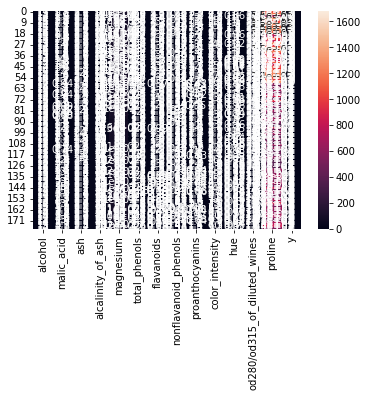

In [10]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(df, annot=True)
# YOUR CODE HERE

In [11]:
# What is the highest correlation between features?
df.corr().abs


<bound method NDFrame.abs of                                alcohol  malic_acid  ...   proline         y
alcohol                       1.000000    0.094397  ...  0.643720 -0.328222
malic_acid                    0.094397    1.000000  ... -0.192011  0.437776
ash                           0.211545    0.164045  ...  0.223626 -0.049643
alcalinity_of_ash            -0.310235    0.288500  ... -0.440597  0.517859
magnesium                     0.270798   -0.054575  ...  0.393351 -0.209179
total_phenols                 0.289101   -0.335167  ...  0.498115 -0.719163
flavanoids                    0.236815   -0.411007  ...  0.494193 -0.847498
nonflavanoid_phenols         -0.155929    0.292977  ... -0.311385  0.489109
proanthocyanins               0.136698   -0.220746  ...  0.330417 -0.499130
color_intensity               0.546364    0.248985  ...  0.316100  0.265668
hue                          -0.071747   -0.561296  ...  0.236183 -0.617369
od280/od315_of_diluted_wines  0.072343   -0.368710  ...  0.

In [12]:
df.corr().unstack().sort_values(ascending= False).drop_duplicates()

alcohol                       alcohol                         1.000000
flavanoids                    total_phenols                   0.864564
                              od280/od315_of_diluted_wines    0.787194
od280/od315_of_diluted_wines  total_phenols                   0.699949
flavanoids                    proanthocyanins                 0.652692
                                                                ...   
y                             hue                            -0.617369
proline                       y                              -0.633717
y                             total_phenols                  -0.719163
od280/od315_of_diluted_wines  y                              -0.788230
y                             flavanoids                     -0.847498
Length: 92, dtype: float64

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [15]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
# Standard = StandardScaler()
# scaled = Standard.fit_transform(df)
# scaled
# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
df_new = df.drop((['y']),axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standard = StandardScaler()
scaled = standard.fit_transform(df_new)
scaled

X_p = pca.fit_transform(scaled)
X_p

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

Text(0, 0.5, 'PC 2')

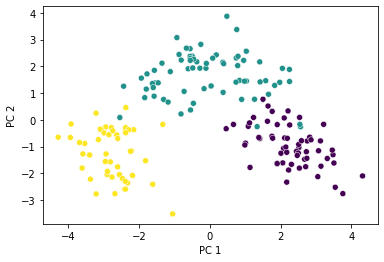

In [16]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
sns.scatterplot(x= X_p[:, 0],y = X_p[:, 1],c = df['y']) 
# plt.title('Ground truth labels, train set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [17]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE

pca = PCA(0.85).fit(scaled)
pca.n_components_

6

In [18]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca = PCA(n_components=3).fit(scaled)
np.sum(pca.explained_variance_ratio_) * 100


66.52996889318523

## Clustering

Let's see how many clusters does K-Means find.



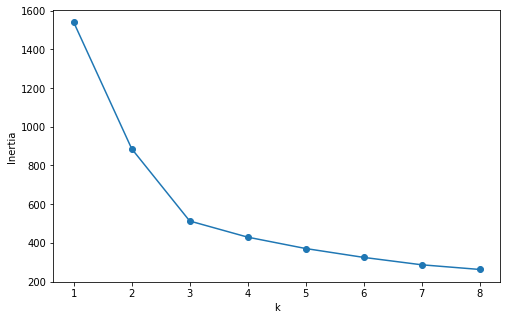

In [19]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
pca = PCA(n_components=3)
score_pca = pca.fit_transform(scaled)
inertia =[]
for k in range(1,9):
    kmeans_pca = KMeans(n_clusters=k)
    kmeans_pca.fit(score_pca)
    inertia.append(kmeans_pca.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

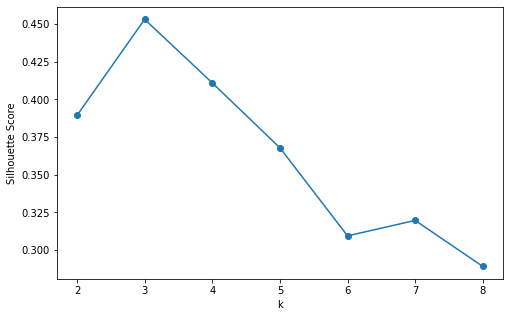

In [20]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
pca = PCA(n_components=3)
score_pca = pca.fit_transform(scaled)
sil = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(score_pca)
    sil.append(silhouette_score(score_pca, y_pred))
# Let's plot SIL vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
print(silhouette_score(score_pca, y_pred))

0.2890789807686554


2


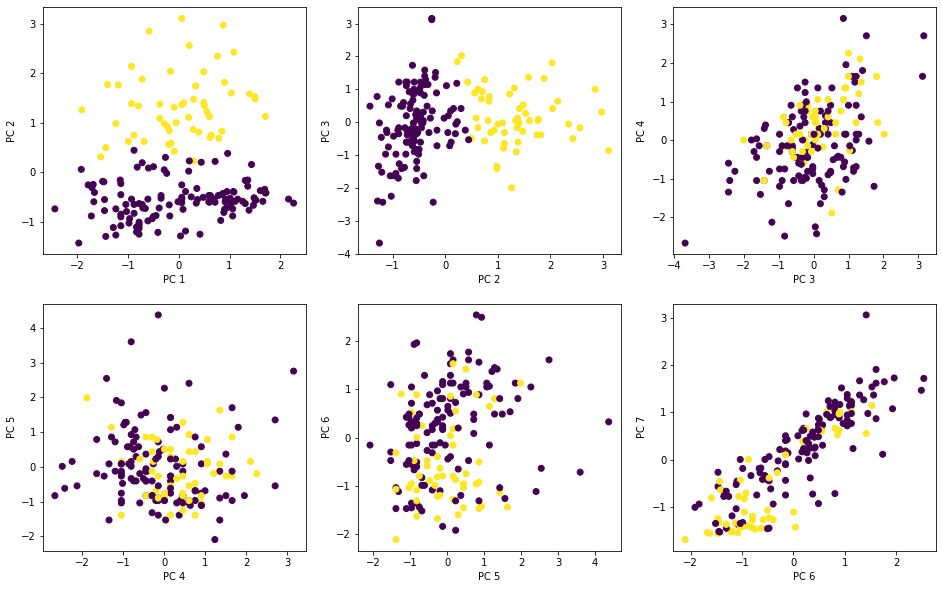

In [23]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE
clusterer = KMeans(n_clusters=2)
clusterer.fit(scaled[:, 1:3])
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(scaled[:, i-1], scaled[:, i], c=clusterer.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()

Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!